In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
X = df.iloc[:,[3,4]].values

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss=[]
for k in range(1,21):
    kmeans = KMeans(n_clusters = k,init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 25005.55037243283,
 21794.8856090982,
 19669.71099830122,
 17584.589416163646,
 16219.23665432796,
 14292.543823365124,
 13283.09350906162,
 12244.76897757415,
 10929.41604717122,
 10181.43400512531,
 9486.06033819122,
 8670.38113763631,
 8232.377498054957]

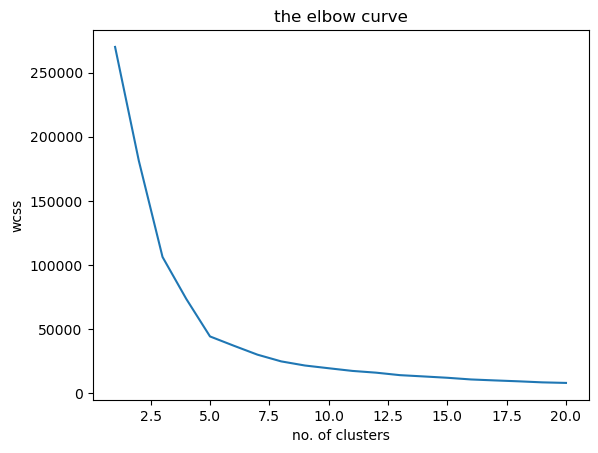

In [12]:
##elbow curve
plt.plot(range(1,21),wcss)
plt.title('the elbow curve')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=29)

In [16]:
y_kmeans = kmeans.fit_predict(X)

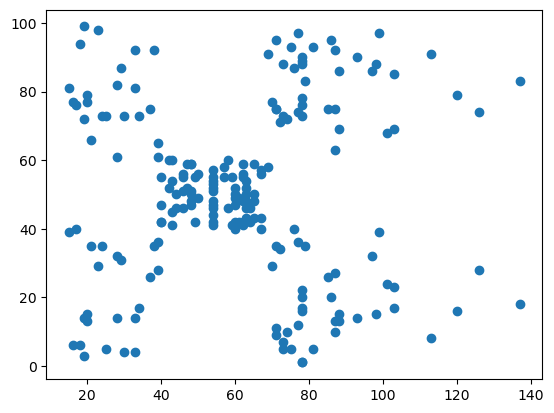

In [17]:
a=df.iloc[:,3]
b=df.iloc[:,4]
plt.scatter(a,b)

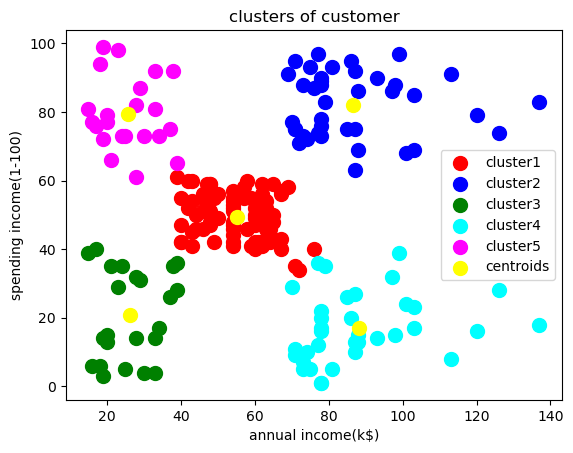

In [18]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='cluster5')


## centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='centroids')
plt.title('clusters of customer')
plt.xlabel('annual income(k$)')
plt.ylabel('spending income(1-100)')
plt.legend()
plt.show()